In [162]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import random
import seaborn as sns
import plotly.express as px

Чтение датасета

In [163]:
df = pd.read_csv('https://raw.githubusercontent.com/Vladcder/HomeWork/refs/heads/hw_4/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Визуализиация распределения значений признаков

In [175]:
def pie_visualization(values,labels,title):
  fig,ax=plt.subplots()
  ax.pie(values,labels=labels,autopct='%1.1f%%')
  plt.title(title)

def hist_visualization(isNum, data,binwidth, step, xlabel, ylabel,title):
  if (isNum==True):
    sns.histplot(x=data,binwidth=binwidth, discrete=True, legend=True);
    plt.xticks(np.arange(round(np.min(data),0), np.max(data)+1, step))
  else:
    sns.histplot(x=data)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)

In [164]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


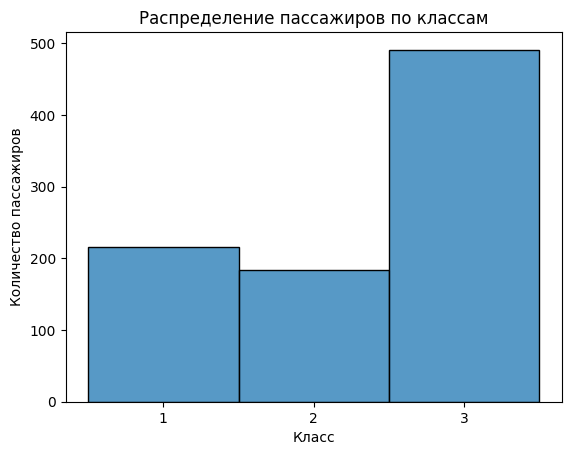

In [176]:
hist_visualization(True, df['Pclass'],1,1,'Класс','Количество пассажиров','Распределение пассажиров по классам')

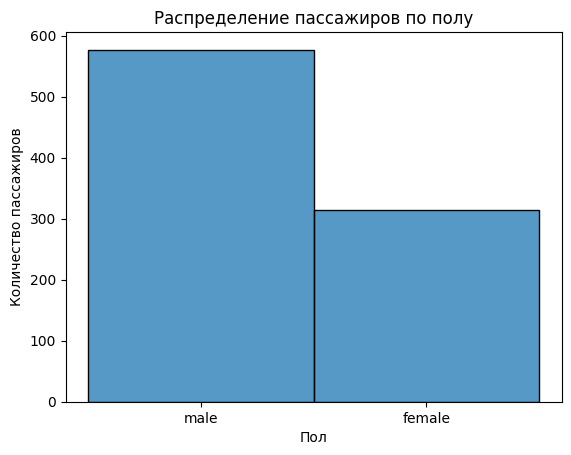

In [177]:

hist_visualization(False, df['Sex'],1,1,'Пол','Количество пассажиров','Распределение пассажиров по полу')

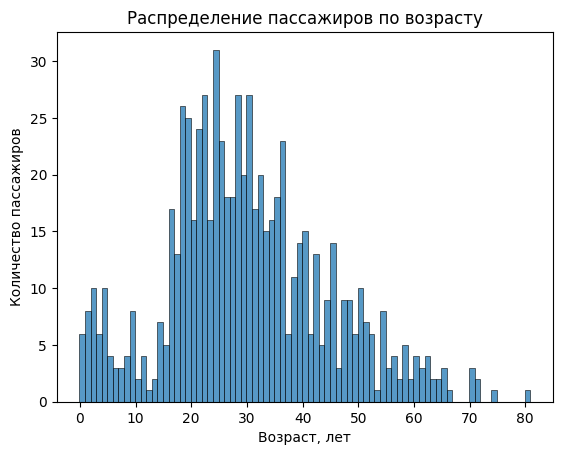

In [178]:

hist_visualization(True, df['Age'],2,10,'Возраст, лет','Количество пассажиров','Распределение пассажиров по возрасту')

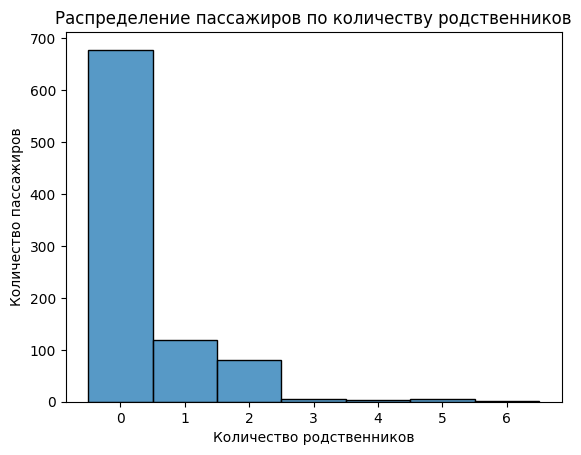

In [179]:
hist_visualization(True, df['Parch'],1,1,'Количество родственников','Количество пассажиров','Распределение пассажиров по количеству родственников')

Text(0.9, 500, '0-пассажир погиб \n1-пассажир выжил')

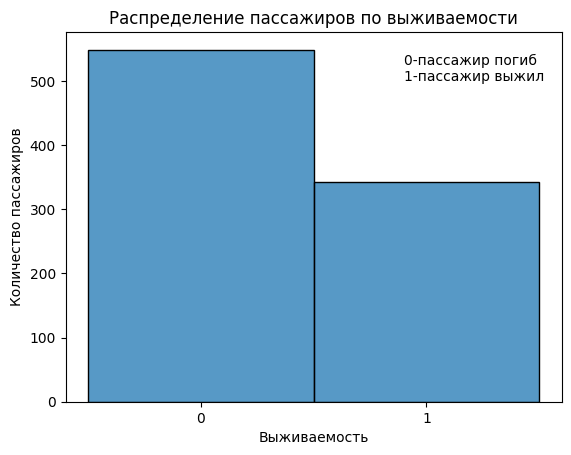

In [180]:
hist_visualization(True, df['Survived'],1,1,'Выживаемость','Количество пассажиров','Распределение пассажиров по выживаемости')
plt.text(0.9,500,'0-пассажир погиб \n1-пассажир выжил')

boxplot для столбца Age

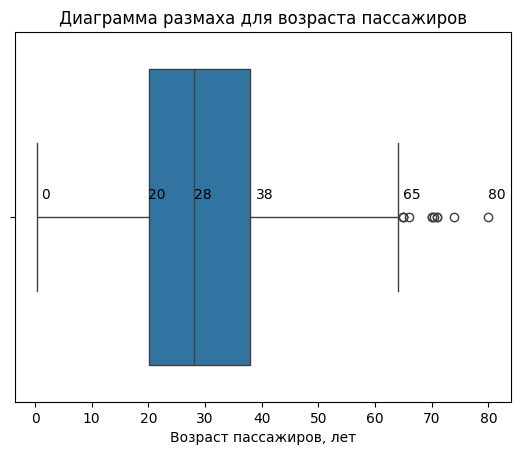

In [170]:
data=df['Age']
sns.boxplot(x=data)

median =data.describe().iloc[5]
q1=data.describe().iloc[4]
q3=data.describe().iloc[6]
dq=q3-q1
min=data.min()
maxq=q3+1.5*dq
max=data.max()
bpValues=dict(
    values=[min,q1,median,q3,maxq,max],
    positions=[min*2,-q1*0.01,median * 0.01,q3*0.02,maxq * 0.005,max*0.005]
)
for i in range(len(bpValues['values'])):
  plt.text(round(bpValues['values'][i]) + round(bpValues['positions'][i]),-0.05,round(bpValues['values'][i]))



plt.xlabel('Возраст пассажиров, лет')
plt.title('Диаграмма размаха для возраста пассажиров')
plt.show()

Интерпретация графика

Минимальный возраст 0 лет;
Максимальный возраст 80 лет;
Медианный возраст 28 лет;
25% пассажиров было младше 20 лет;
25% пассажиров было старше 38 лет;
Возраст старше 65 лет обозначен как выбросы;

Pie plot для количества выживших и распределения по классам

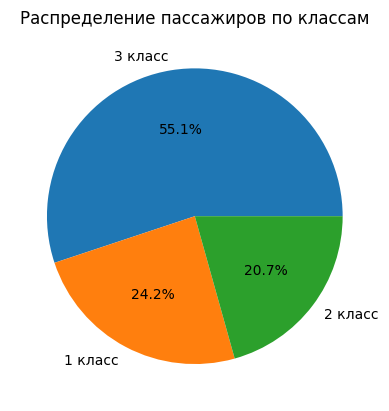

In [171]:
pie_visualization(df['Pclass'].value_counts(),['3 класс', '1 класс', '2 класс'],'Распределение пассажиров по классам')

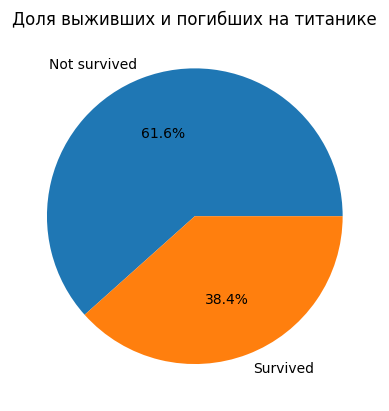

In [172]:

pie_visualization(df['Survived'].value_counts(),['Not survived', 'Survived'],'Доля выживших и погибших на титанике')

Pair plot для всех числовых переменных датасета

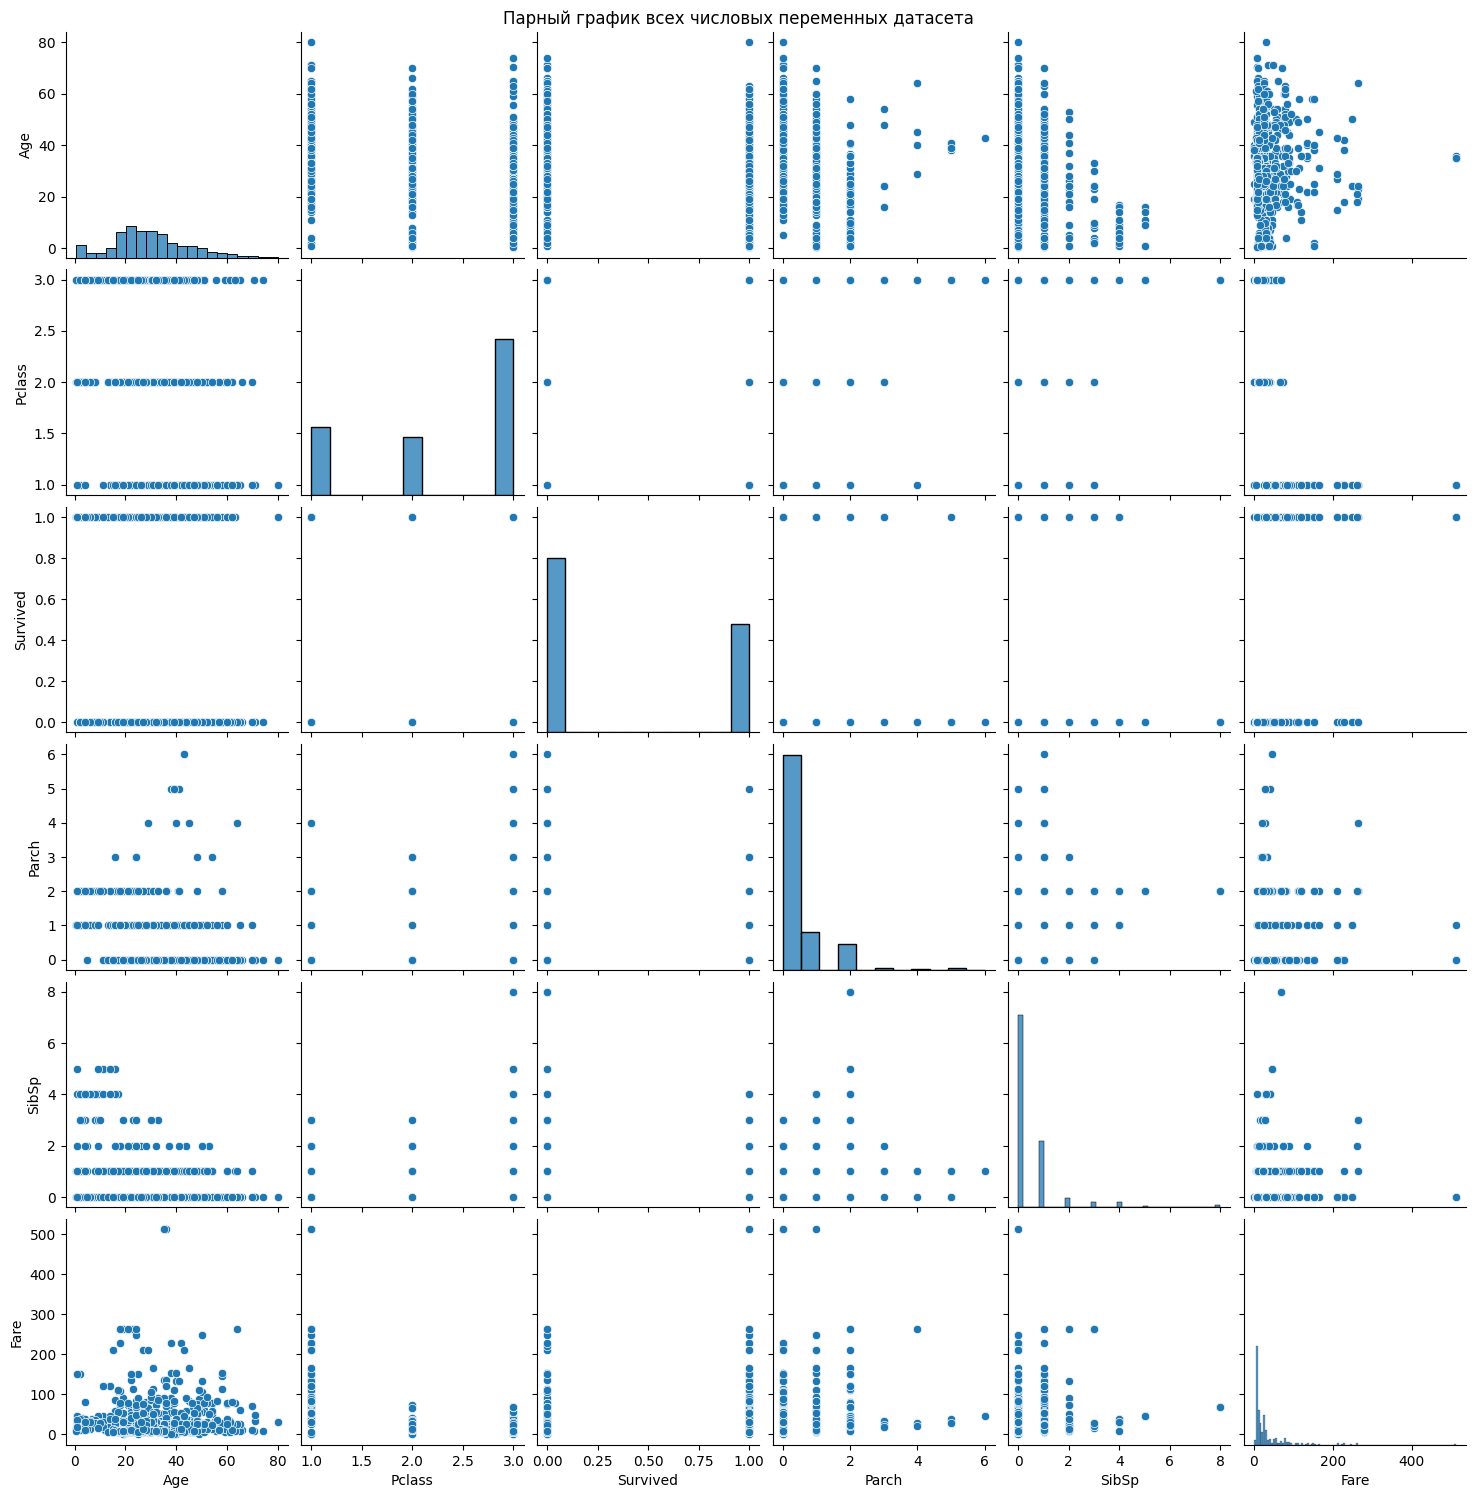

In [173]:
numDf=df[['Age','Pclass','Survived', 'Parch','SibSp','Fare']]
pairplot = sns.pairplot(numDf)
pairplot.fig.suptitle('Парный график всех числовых переменных датасета',y=1)

plt.show()



In [174]:
fig =px.sunburst(df, path=['Pclass', 'Sex'],title='Визуализация иерархических данных по классам и полу')
fig.show()
